In [1]:
! wget https://setup.johnsnowlabs.com/nlu/kaggle.sh  -O - | bash
! pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple peanut_butter_data_time==3.0.1rc63 > /dev/null 


import nlu

--2021-05-04 05:48:02--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/3.0.1rc1/scripts/kaggle_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1567 (1.5K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.53K  --.-KB/s    in 0s      

2021-05-04 05:48:02 (28.9 MB/s) - written to stdout [1567/1567]

setup Kaggle for PySpark 3.0.2 and Spark NLP 3.0.2
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jre-headless_8u252-b09-1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Failed to fetch http://security.ubuntu.com/ubuntu/pool/universe/o/openjdk-8/openjdk-8-jdk-headless_8u252-b09-1~18.04_amd64.deb  404  Not Found [IP: 91.189.88.152 80]
E: Unable to fetch some archiv

In [2]:
import nlu
import pandas as pd
df = pd.read_csv('/kaggle/input/twitter-airline-sentiment/Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
nlu_emotion_df = nlu.load('emotion').predict(df,output_level='document')
nlu_emotion_df

classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,text,origin_index,negativereason_gold,sentence_embedding_tfhub_use,tweet_created,tweet_location,negativereason,tweet_coord,document,airline,...,user_timezone,airline_sentiment_gold,tweet_id,airline_sentiment,name,retweet_count,sentence,emotion,emotion_confidence_confidence,airline_sentiment_confidence
0,@VirginAmerica What @dhepburn said.,0,None,"[0.021437114104628563, 0.027111100032925606, -...",2015-02-24 11:35:52 -0800,None,None,None,@VirginAmerica What @dhepburn said.,Virgin America,...,Eastern Time (US & Canada),None,570306133677760513,neutral,cairdin,0,[@VirginAmerica What @dhepburn said.],surprise,0.996009,1.0000
1,@VirginAmerica plus you've added commercials t...,1,None,"[0.011295964941382408, -0.01899844780564308, -...",2015-02-24 11:15:59 -0800,None,None,None,@VirginAmerica plus you've added commercials t...,Virgin America,...,Pacific Time (US & Canada),None,570301130888122368,positive,jnardino,0,[@VirginAmerica plus you've added commercials ...,joy,0.971736,0.3486
2,@VirginAmerica I didn't today... Must mean I n...,2,None,"[-0.013457144610583782, -0.015552197583019733,...",2015-02-24 11:15:48 -0800,Lets Play,None,None,@VirginAmerica I didn't today... Must mean I n...,Virgin America,...,Central Time (US & Canada),None,570301083672813571,neutral,yvonnalynn,0,"[@VirginAmerica I didn't today., .., Must mean...",sadness,0.987823,0.6837
3,@VirginAmerica it's really aggressive to blast...,3,None,"[0.04680633917450905, -0.034680865705013275, -...",2015-02-24 11:15:36 -0800,None,Bad Flight,None,@VirginAmerica it's really aggressive to blast...,Virgin America,...,Pacific Time (US & Canada),None,570301031407624196,negative,jnardino,0,[@VirginAmerica it's really aggressive to blas...,fear,0.999637,1.0000
4,@VirginAmerica and it's a really big bad thing...,4,None,"[0.03326622024178505, -0.02844991348683834, -0...",2015-02-24 11:14:45 -0800,None,Can't Tell,None,@VirginAmerica and it's a really big bad thing...,Virgin America,...,Pacific Time (US & Canada),None,570300817074462722,negative,jnardino,0,[@VirginAmerica and it's a really big bad thin...,surprise,0.990764,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,@AmericanAir thank you we got on a different f...,25769807147,None,"[0.017243443056941032, 0.06847779452800751, -0...",2015-02-22 12:01:01 -0800,None,None,None,@AmericanAir thank you we got on a different f...,American,...,None,None,569587686496825344,positive,KristenReenders,0,[@AmericanAir thank you we got on a different ...,joy,0.999056,0.3487
14636,@AmericanAir leaving over 20 minutes Late Flig...,25769807148,None,"[-0.06216602399945259, 0.07208847254514694, -0...",2015-02-22 11:59:46 -0800,Texas,Customer Service Issue,None,@AmericanAir leaving over 20 minutes Late Flig...,American,...,None,None,569587371693355008,negative,itsropes,0,[@AmericanAir leaving over 20 minutes Late Fli...,joy,0.999932,1.0000
14637,@AmericanAir Please bring American Airlines to...,25769807149,None,"[-0.01714656874537468, 0.06899432092905045, -0...",2015-02-22 11:59:15 -0800,"Nigeria,lagos",None,None,@AmericanAir Please bring American Airlines to...,American,...,None,None,569587242672398336,neutral,sanyabun,0,[@AmericanAir Please bring American Airlines t...,sadness,0.999648,1.0000
14638,"@AmericanAir you have my money, you change my ...",25769807150,None,"[0.04970557615160942, 0.014138667844235897, 0....",2015-02-22 11:59:02 -0800,New Jersey,Customer Service Issue,None,"@AmericanAir you have my money, you change my ...",American,...,Eastern Time (US & Canada),None,569587188687634433,negative,SraJackson,0,"[@AmericanAir you have my money, you change my...",sadness,0.997880,1.0000


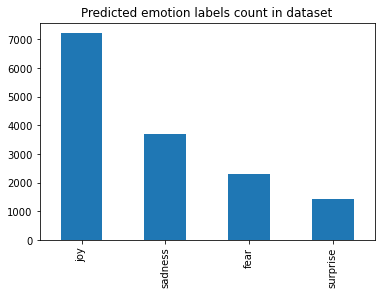

In [4]:
nlu_emotion_df['emotion'].value_counts().plot.bar(title='Predicted emotion labels count in dataset')


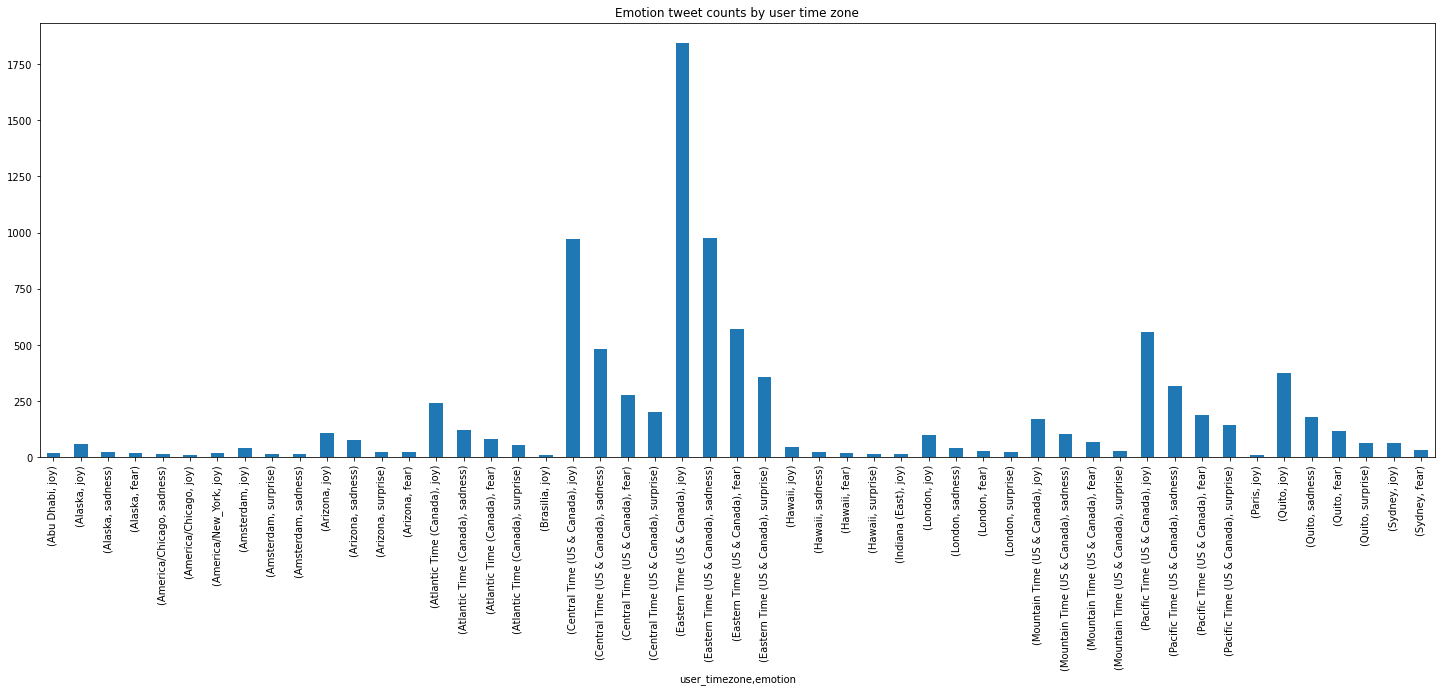

In [5]:
counts = nlu_emotion_df.groupby('user_timezone')['emotion'].value_counts()
counts[counts >10].plot.bar(figsize=(25,8),title='Emotion tweet counts by user time zone')

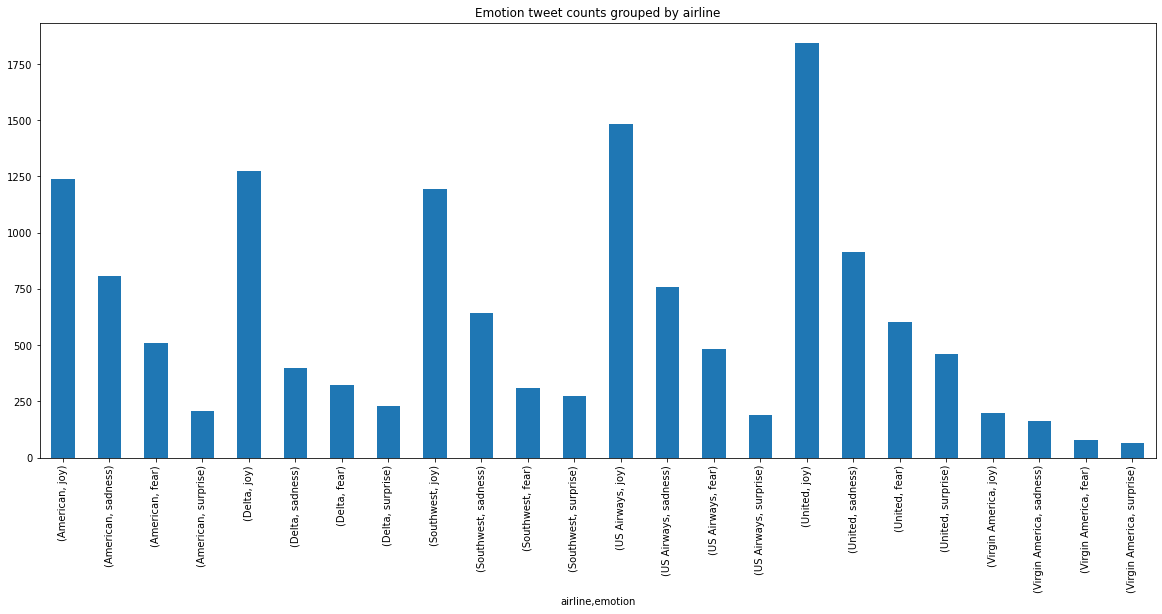

In [6]:
nlu_emotion_df.groupby('airline')['emotion'].value_counts().plot.bar(figsize=(20,8), title='Emotion tweet counts grouped by airline')
